# Predicting Median House Values in California using Linear Regression

**Case Study:**

The goal of this case study is to develop a linear regression model to predict the median house values in California based on various features. By exploring and analyzing the dataset, performing data cleaning and preprocessing, fitting a linear regression model, and evaluating its performance, the aim is to create an accurate predictive model that can estimate median house values for different locations in California.

## Dataset description

The California Housing dataset is a popular dataset used for regression tasks, specifically for predicting housing prices. It contains information about various features of houses in different locations in California, along with their corresponding median house values.

Here is a description of the features in the California Housing dataset:

- **MedInc:** Median income of the block.
- **HouseAge:** Median age of the houses in the block.
- **AveRooms:** Average number of rooms per dwelling.
- **AveBedrms:** Average number of bedrooms per dwelling.
- **Population:** Total population in the block.
- **AveOccup:** Average number of occupants per dwelling.
- **Latitude:** Latitude coordinate of the block.
- **Longitude:** Longitude coordinate of the block.

The target variable in the dataset is:

MedHouseVal: Median house value of the block (the target variable you'll aim to predict).

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.linear_model import LinearRegression

# Fetch the California Housing dataset
california_housing = fetch_california_housing()

# Create a DataFrame from the dataset
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target
df = df.rename(columns={'target': 'MedHouseVal'})

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Exploratory Data Analysis


### Descriptive Statistics

Obtain an overview of the dataset by using Python built-in functions to display the first few rows, get the summary of the DataFrame, calculate basic descriptive statistics, etc...

In [2]:
# Descriptive Statistics
print(df.head())  # Display the first few rows of the DataFrame
print(df.info())  # Summary of the DataFrame
print(df.describe())  # Basic descriptive statistics
print(df.isnull().sum())  # Check for missing values
print(df.corr())  # Calculate the correlation between variables

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

### Create Plots

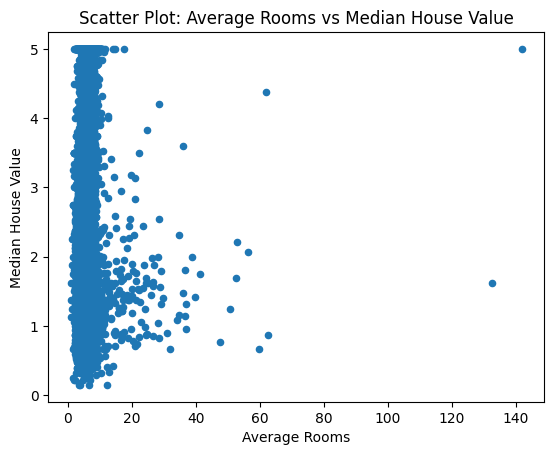

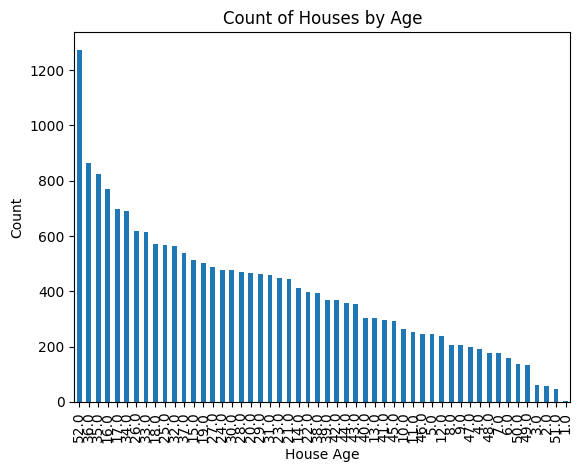

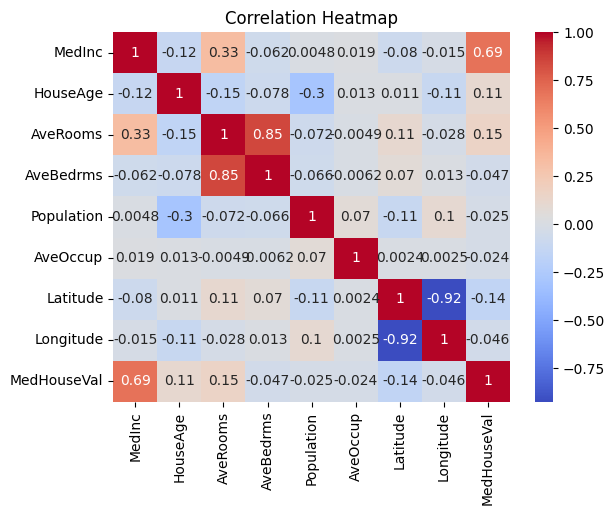

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


df.plot.scatter(x='AveRooms', y='MedHouseVal')  # Scatter Plot
plt.xlabel('Average Rooms')
plt.ylabel('Median House Value')
plt.title('Scatter Plot: Average Rooms vs Median House Value')
plt.show()

df['HouseAge'].value_counts().plot.bar()  # Bar Chart
plt.xlabel('House Age')
plt.ylabel('Count')
plt.title('Count of Houses by Age')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Correlation Heatmap
plt.title('Correlation Heatmap')
plt.show()

## Fit a Linear Regression

### Import Libraries

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

### Split Data

In [5]:

# Split the data into features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Fit the model

In [6]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test set
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5558915986952444
